In [1]:
from scipy.cluster.hierarchy import ward, complete, average, weighted, fcluster, dendrogram, linkage
from scipy.spatial.distance import pdist

from nn_chain_algorithm import nn_chain
from argmin_test import knn_chain
from nn_chain_algorithm_standard import standard_nn_chain

import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [2]:
def generate_multivariate_gaussian_data(num_samples, num_features, num_distributions):
    """
    Generate a massive multidimensional, multivariate Gaussian dataset.

    Parameters:
    - num_samples: Total number of samples to generate.
    - num_features: Number of features (dimensions) for each sample.
    - num_distributions: Number of different Gaussian distributions.

    Returns:
    - data: Generated dataset of shape (num_samples, num_features).
    """
    data = []
    samples_per_distribution = num_samples // num_distributions

    for i in range(num_distributions):
        mean = np.random.rand(num_features) * 100
        cov = np.random.rand(num_features, num_features)
        cov = np.dot(cov, cov.transpose())

        distribution_data = np.random.multivariate_normal(mean, cov, samples_per_distribution)
        data.append(distribution_data)

    data = np.vstack(data)
    return data

In [3]:
num_samples = 1000
num_features = 10
num_distributions = 5

X = generate_multivariate_gaussian_data(num_samples, num_features, num_distributions)

print(f"Generated dataset shape: {X.shape}")

Generated dataset shape: (1000, 10)


In [4]:
# plt.scatter(X[:, 0], X[:, 1])
# for i, c in enumerate(X):

#     label = i, list(c)

#     plt.annotate(label,
#                  (c),
#                  textcoords="offset points",
#                  xytext=(0,10),
#                  ha='center')

# plt.grid()
# plt.show()

In [5]:
# My original algorithm result, that pops the last element
# get the start time
st = time.process_time()
########## FIX 
A = nn_chain(X, 3)
##########
# get the end time
et = time.process_time()
# get execution time
ex_time_original = et - st

In [6]:
# Using argmin
# get the start time
st = time.process_time()
########## FIX 
B = knn_chain(X, 3)
##########
# get the end time
et = time.process_time()
# get execution time
ex_time_argmin = et - st

In [7]:
# Using the standard function
# get the start time
st = time.process_time()
########## 
y = pdist(X)
C = standard_nn_chain(y, len(X))
##########
# get the end time
et = time.process_time()
# get execution time
ex_time_standard = et - st

## Execution Time comparison:

In [8]:
print(f"""CPU Execution time for the: 
      1. original function = {ex_time_original} s,
      2. argmin function = {ex_time_argmin} s,
      3. standard function = {ex_time_standard} s.""")

CPU Execution time for the: 
      1. original function = 7.048441248 s,
      2. argmin function = 5.713940327000001 s,
      3. standard function = 30.058614445000003 s.


## Dendrogram comparison

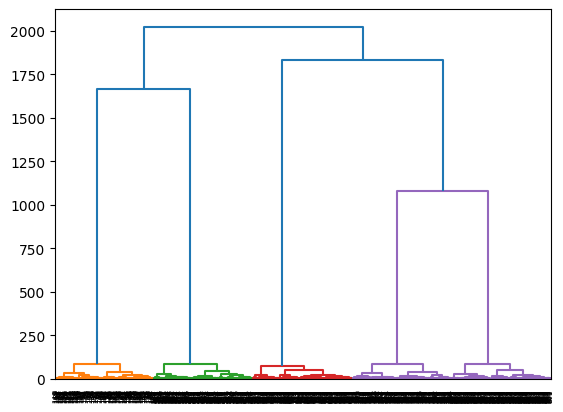

In [9]:
dendrogram(A)
plt.show()

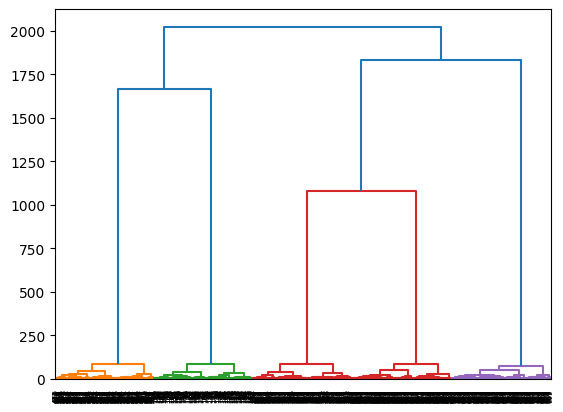

In [10]:
dendrogram(B)
plt.show()

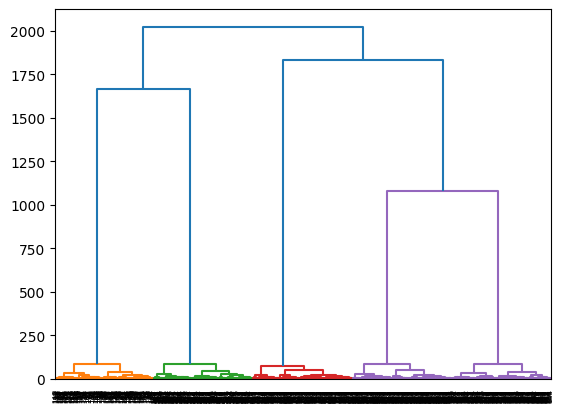

In [11]:
dendrogram(C)
plt.show()

## Current SciPy implementation

TIMING: 
CPU Execution time: 0.016747166000001812 seconds


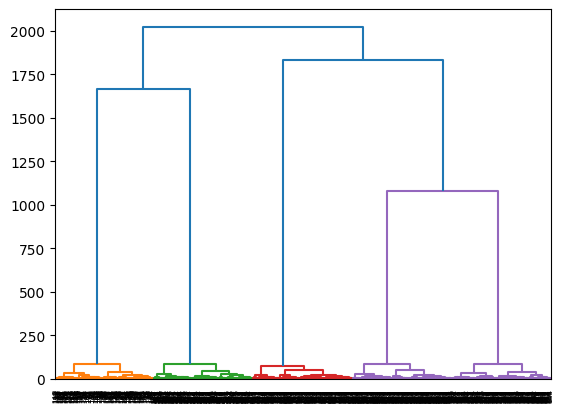

In [12]:
print("TIMING: ")
# get the start time
st = time.process_time()
########## FIX 
y = pdist(X) 
Z = ward(y)
##########
# get the end time
et = time.process_time()
# get execution time
res = et - st
print('CPU Execution time:', res, 'seconds')

dendrogram(Z)
plt.show()